##**SVM from scratch**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



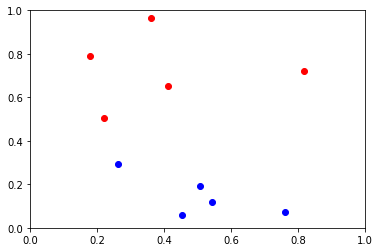

In [16]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



<a href="https://ibb.co/HB7fCt7"><img src="https://i.ibb.co/yd0cp60/Algorithm.jpg" alt="Algorithm" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'></a><br />

we get 3 weights<br/>

Equation which we get is in the form of `w[0]*x + w[1]*y + w[2] = 0`

`w[2]` is bias in these case

As we transformed input X into X = [1  X ]  so that 1 will be acting as bias here


<img src="https://campuspro-uploads.s3-us-west-2.amazonaws.com/137ca272-f98d-40bb-9c31-2849f3994cbe/b697f685-6562-465e-b51d-6876cc4676a1/1.JPG"/>

In [0]:
def svm_function(x, y, epoch, l_rate):
    ###################################
    Ones=np.ones((len(x),1))
    x=np.append(x,Ones,axis=1)
    w = np.zeros(len(x[0]))
    for e in range(0,epoch):
      i = random.choice(range(0,len(x)))
      result = y[i]*np.dot(x[i], w)
      if result < 1:
        w = (1-(1/(e+1))) * w + (y[i] * x[i])/(l_rate*(e+1))
      else:
        w = (1-(1/(e+1)))*w
      normt = 1/((np.sqrt(l_rate))*LA.norm(w))
      if normt<1:
        w = w*normt;
    ###################################
    return w



---


**Run SVM Classifier**


---



In [21]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 0.01)
w

array([-0.70131697,  4.21945899, -1.45661499])

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



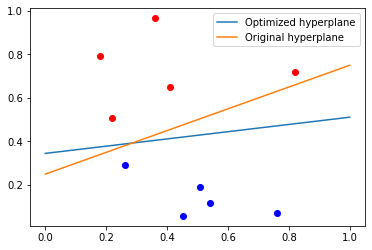

In [22]:
###################################
a =-w[0]/w[1]
b = -w[2]/w[1]
xx = np.linspace(0, 1)
yy =  a * xx + b

a1 = 0.5
b1=0.25
yy1 =   a1 * xx + b1

fig = plt.figure()
ax = plt.subplot(111)
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y, c=clr)
ax.plot(xx,yy,label='Optimized hyperplane')
ax.plot(xx,yy1,label='Original hyperplane')
ax.legend()
###################################